# Алгоритм Нидлмана-Вунша

**Задача:** 

реализовать алгоритм для выравнивания двух последовательностей большой длины.

**Выполнили:** 
- Здрогова Дарья, 
- Смолин Павел, 
- Антропова Ольга, 
- Фаттахов Марат.

## Общая идея алгоритма и его реализация

Это алгоритм, который вычисляет наивысший балл для 2 выравниваний последовательностей на основе матрицы баллов (матрицы замены).

**Ключевые элементы:**

1. **Матрица оценок** - разные оценки для совпадающих и несовпадающих букв, линейный штраф за разрыв (число, вычитаемое за каждый разрыв).

**Фрагмент кода с созданием матрицы:**
```
a = [[0 for _ in range(len(s1) + 1)] for _ in range(len(s2) + 1)] 
for i in range(len(s2) + 1):
    a[i][0] = -i
for j in range(len(s1) + 1):
    а[0][j] = -j
```

2. **Алгоритм расчета** наивысшего балла сравнения: назначается двумерный массив (или матрица), содержащая столько же строк, сколько символов в первой последовательности, и столько же столбцов, сколько символов во второй последовательности. Запись в строке ***i*** и столбце ***j*** обозначается как ***F(i, j)***. 
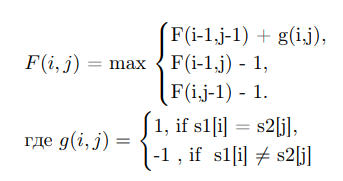

**Работа алгоритма:**

Для вычисления самого выравнивания, которое получило такую оценку, нужно начать с правой нижней клетки и сравнивать значение в ней с клетками, которые находятся левее, выше или по вверх и влево по диагонали

**Код для заполнения матрицы оценок:**
```
gap = -1
for i in range(1, len(s2) + 1):
        for j in range(1, len(s1) + 1):
            a[i][j] = max(a[i - 1][j - 1] + (match if s2[i - 1] == s1[j - 1] else mismatch),
                          a[i - 1][j] + gap, a[i][j - 1] + gap)
```

**Нахождение оптимального выравнивания по матрице:**


**Главная задача:** выравнивание последовательностей оптимальным вариантом, совпадение букв или пропуск (пробел) для двух последовательностей будут иметь положительную оценку, а за сопоставление разных букв будет назначаться штраф.

**Алгоритм:**
Сначала устанавливается исходная клетка - начало пути оптимального варианта выравнивания по матрице - нижняя правая клетка. 
Создается 2 пустых строки, которые будут результатами работы нашего алгоритма. 
Далее совершается проход по матрице, где выбирается клетка (слева, сверху или по сверху/влево (по диагонали)) с максимальным весом в матрице весов.
Если мы дошли до верхней (или правой) границы матрицы весов, то продолжаем двигаться вдоль нее до верхней левой клетки, к первой строке добавляются символы, в ячейки которых мы переходим, а ко второй добавляются пробелы. 

```
i = len(s2)
j = len(s1)
s1n = ''
s2n = ''

while i > 0 or j > 0:
    if i == 0:
        s1n = s1[:j] + s1n
        s2n = '-' * (j) + s2n
        break

    if j == 0:
        s2n = s2[:i] + s2n
        s1n = '-' * (i) + s1n
        break

    score = a[i][j]
    scoreDiag = a[i - 1][j - 1]
    scoreUp = a[i - 1][j]
    scoreLeft = a[i][j - 1]
    
    if s1[j - 1] == s2[i - 1] and score == scoreDiag + match:
        s1n = s1[j - 1] + s1n
        s2n = s2[i - 1] + s2n
        i -= 1
        j -= 1
        
    elif s1[j - 1] != s2[i - 1] and score == scoreDiag + mismatch:  
        s1n = s1[j - 1] + s1n
        s2n = s2[i - 1] + s2n
        i -= 1
        j -= 1
        
    elif score == scoreUp + gap:
        s1n = '-' + s1n
        s2n = s2[i - 1] + s2n
        i -= 1
        
    elif  score == scoreLeft + gap:
        s2n = '-' + s2n
        s1n = s1[j - 1] + s1n
        j -= 1
```

## Корректность работы алгоритма

Для проверки работы алгоритма были взяты строки длиной больше 10^4  символов, для которых оптимальный способ выравнивания можно определить вручную.

**Один из тестов**

- Исходная строка А: aaa...abbbbb
- Исходная строка B: bbbbbc...ccccc.

Так как для нас приоритетнее пропуск в строках результата, чем сопоставление разных символов, очевидно, что выравнивание должно иметь вид:

                    aaa...abbbbb--...-
                    ---...-bbbbbcc...c
                
Алгоритм выводит такой же результат. Аналогичные результаты мы получаем и на остальных тестах.

**Вывод:** алгоритм справляется с задачей выравнивания последовательностей, находя оптимальный способ сопоставления двух строк.

## Оценка работы алгоритма

Для оценивания времени работы алгоритма были проведены тесты на оригинальном интепретаторе Python (3.8) и на интерпретаторе PyPy (3.8).

Описание входных данных для каждого теста: строки, идентичные использованным для описанных выше тестов на корректность работы (единственное отличие - разное количество одинаковых символов, идущих подряд, для сокращения длины строки)

**Тест на строках длины 10^2**

PyPy выигрывает по скорости работы в 3 тестах из 5. Это связано скорее всего с тем, что длины строк довольно малы, а потому нет пространства для разгона интерпретатора (стандартный интерпретатор на малых длинах строк работает сравнительно так же).

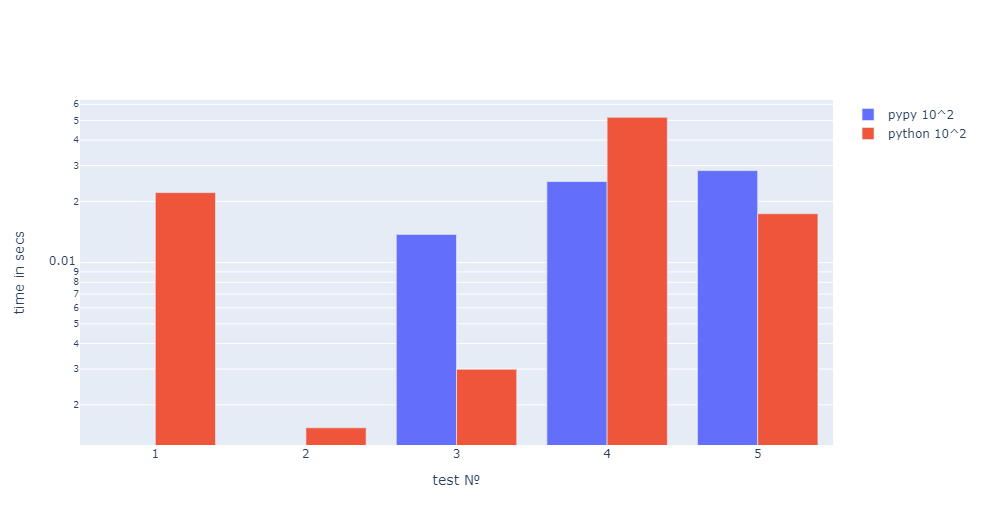

**Тесты на строках длины 10^3**

Ситуация, схожая с той, что была на предыдущем тесте. Строки до сих пор небольшой длины, а значит нет места для большого отрыва между скоростью работы интепретаторов. Однако на некоторых тестах (№1, №3 и №4) прирост составляет 2848900%, что уже показывает преимущество PyPy над стандартным интерпретатором. 

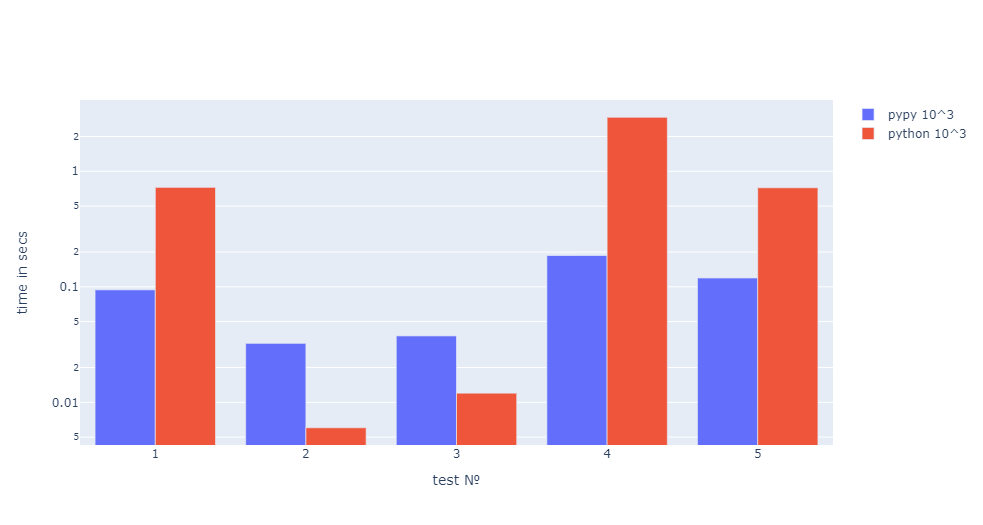

**Тесты на строках длины 10^5**

При данной длине строки самым эффективным оказывается PyPy.

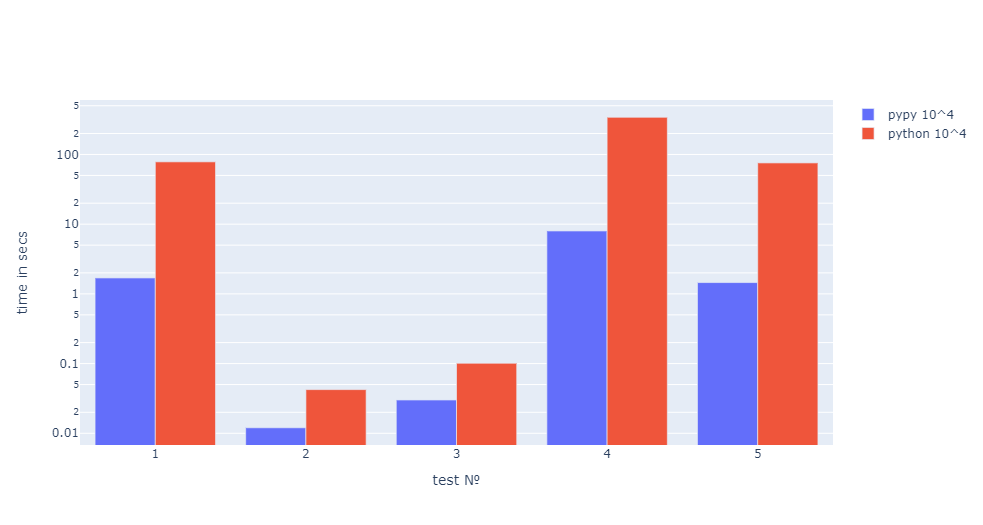

**Общие выводы из тестов:** 

- При работе нашего алгоритма выгоднее использовать интерпретатор PyPy, который значительно увеличивает скорость работы, что будет ощущаться гораздо больше с увеличением длины строк;

- Однако при тестах на малых длинах строк не имеет особой значимости, какой интерпретатор использовать, потому как оба дают сопоставимые результаты;

- Тесты со строками длины 10^5 и больше провести затруднительно, поскольку алгоритм требователен к использованию памяти при больших длинах строк;

- Но можно приблизительно вычислить время работы алгоритма на больших строках, исходя из полученных результов: если учитывать время на экспериментах №4 и №5 (тесты на 10^3, 10^4 и 10^5), то возрастание времени с увеличением длины строки не меньше половины квадрата предыдущего возрастания, из чего следует, что эксперимент №4 для строк 10^5 должен выполняться не менее 1500 секунд, а №5 - не меньше 100.  